In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('./data/student_scores.csv')

In [3]:
df.columns = ['Study_hours', 'Test_scores']
df.head()

,Study_hours,Test_scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.dtypes

Study_hours    float64
Test_scores      int64
dtype: object

In [5]:
df.corr()

,Study_hours,Test_scores
Study_hours,1.000000,0.975843
Test_scores,0.975843,1.000000


Text(0, 0.5, 'Student scores')

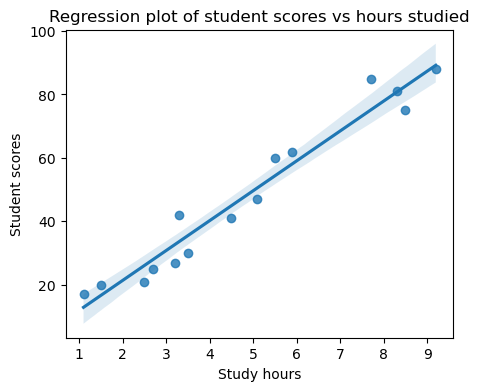

In [6]:
plt.figure(figsize=(5, 4))
sns.regplot(x='Study_hours', y='Test_scores', data=df)
plt.title('Regression plot of student scores vs hours studied')
plt.xlabel('Study hours')
plt.ylabel('Student scores')

# LINEAR REGRESSION

In [7]:
lr = LinearRegression()
X = df[['Study_hours']]
y = df['Test_scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
test_prediction = lr.predict(X_test)
train_prediction = lr.predict(X_train)

In [10]:
mse_test = mean_squared_error(y_test, test_prediction)
r2_test = r2_score(y_test, test_prediction)
print(f'Mean squared error: {mse_test}')
print(f'R-squared: {r2_test}')


Mean squared error: 22.662007472534466
R-squared: 0.9334774731725994


In [11]:
mse_train = mean_squared_error(y_train, train_prediction)
r2_train = r2_score(y_train, train_prediction)
print(f'Mean squared error: {mse_train}')
print(f'R-squared: {r2_train}')

Mean squared error: 30.908765874114792
R-squared: 0.9499650128056598


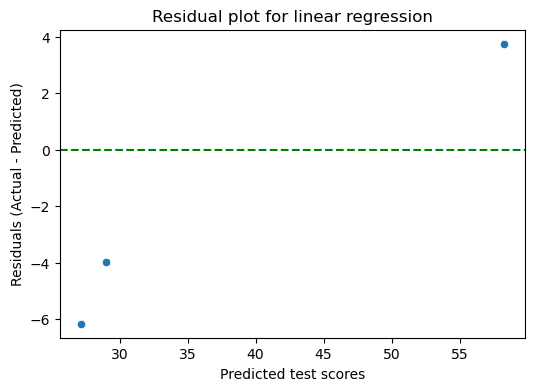

In [12]:
residuals = y_test - test_prediction

plt.figure(figsize=(6, 4))
sns.scatterplot(x=test_prediction, y=residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted test scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual plot for linear regression')
plt.show()

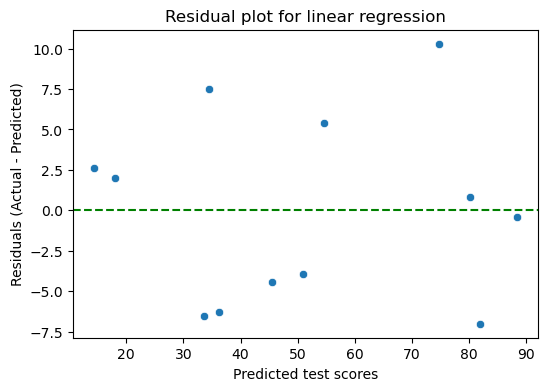

In [13]:
residuals = y_train - train_prediction

plt.figure(figsize=(6, 4))
sns.scatterplot(x=train_prediction, y=residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted test scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual plot for linear regression')
plt.show()

# POLYNOMIAL REGRESSION

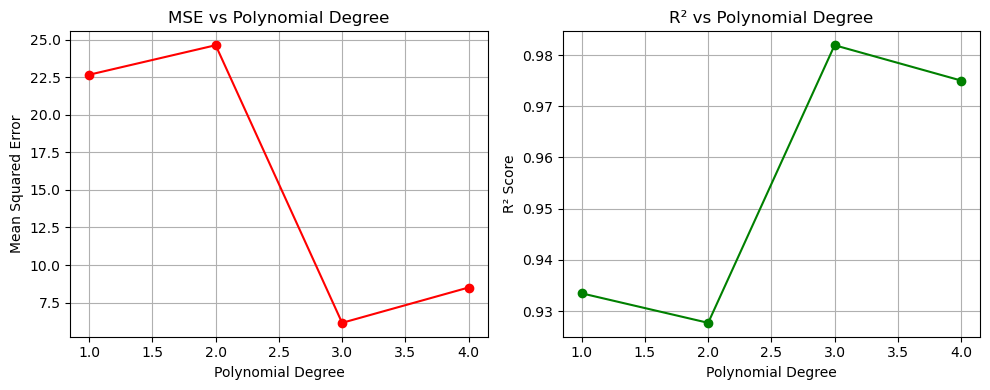

In [14]:
degree = range(1, 5)
mse_list = []
r2_list = []
for num in degree:
    Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree = num)), ('model', LinearRegression())]
    pipeline = Pipeline(Input)
    
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    mse_list.append(mse)
    r2_list.append(r2)    
    
plt.figure(figsize=(10, 4))
    
# MSE plot
plt.subplot(1, 2, 1)
plt.plot(degree, mse_list, marker='o', color= 'red', label='MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.grid(True)
    
# R² Plot
plt.subplot(1, 2, 2)
plt.plot(degree, r2_list, marker='o', color='green', label='R² Score')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("R² vs Polynomial Degree")
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 3)), ('model', LinearRegression())]
pipeline = Pipeline(Input)
    
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
    
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MSE: 6.158272006394235
R-squared: 0.9819228806074534


c:\Users\Student\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


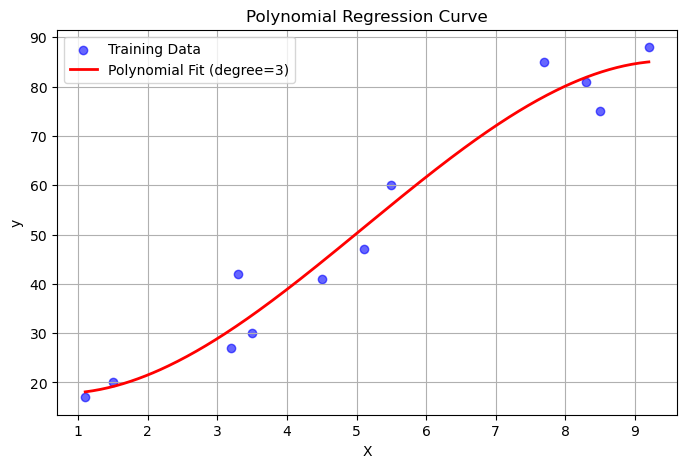

In [17]:
x_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

y_curve = pipeline.predict(x_range)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(x_range, y_curve, color='red', linewidth=2, label='Polynomial Fit (degree=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Curve')
plt.legend()
plt.grid(True)
plt.show()